In [36]:
%pylab inline
import csv
from scipy.optimize import *
from numpy.lib.recfunctions import *


# Load all the data
x = np.genfromtxt(
    "classification_vs_measures.csv",
    delimiter=",",
    names=True,
    missing_values=[""],
    filling_values=[0.0])
def fishy(x):
    return x[x["classification"] > 0.5]
def nonfishy(x):
    return x[x["classification"] < 0.5]
xfishy = fishy(x)
xnonfishy = nonfishy(x)


# Define some usefull functions
def clamp(x, low, high):
    return where(x <= high,
        where(x >= low, x, low),
        high)

def center_hist_bins(histres):
    y = histres[0]
    x = histres[1]
    x = (x[:-1] + x[1:]) / 2.0
    return y, x

def polynomial(x, *args):
    res = 0
    for ind, arg in enumerate(args):
        res += arg * x**ind
    return res

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [25]:
# Print data columns
x.dtype.names

('classification',
 'measure_new_score',
 'measure_coursestddev',
 'measure_speedddev',
 'measure_speeddavg',
 'distance_to_shore',
 'distance_to_port',
 'despoof_speed',
 'speed')

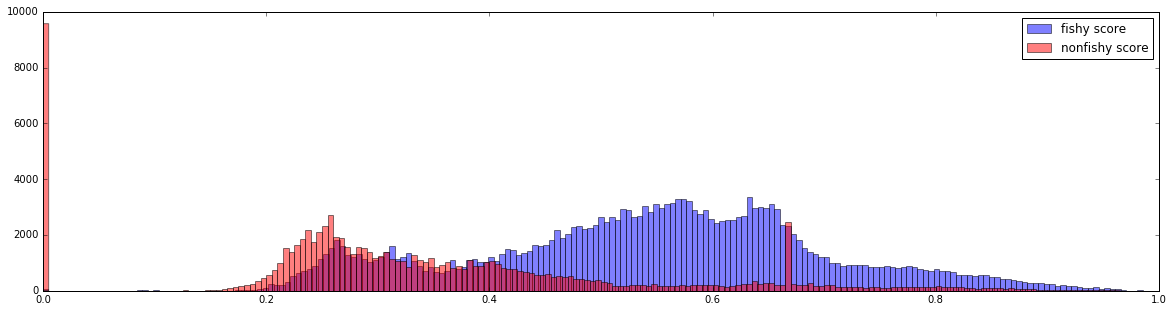

In [20]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(111)
subplot.hist(xfishy["measure_new_score"], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
subplot.hist(xnonfishy["measure_new_score"], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()
show()

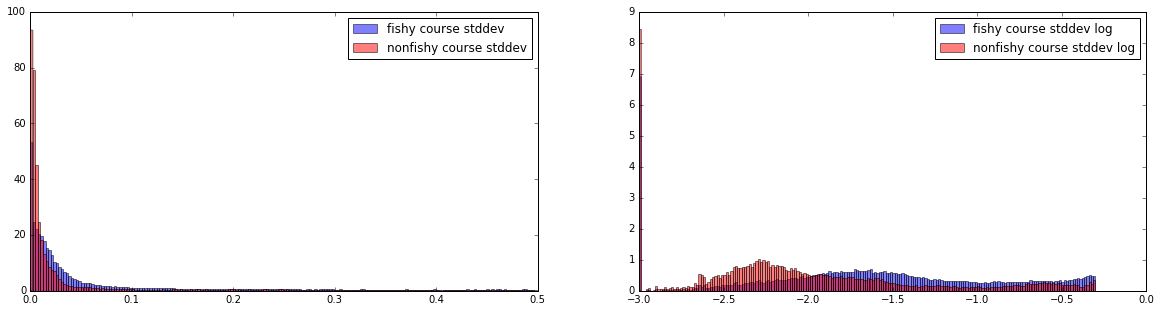

In [22]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(121)
subplot.hist(xfishy["measure_coursestddev"], bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev")
subplot.hist(xnonfishy["measure_coursestddev"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev")
legend()

subplot = histfig.add_subplot(122)
subplot.hist(log10(xfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log")
subplot.hist(log10(xnonfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log")
legend()
show()


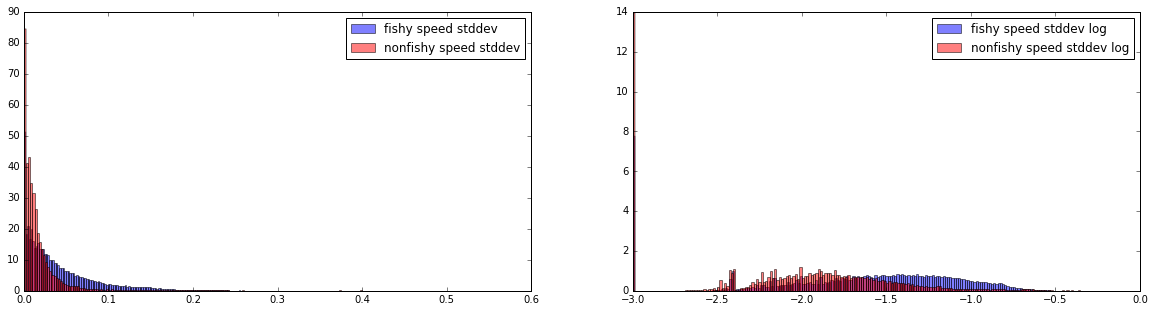

In [26]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(121)
subplot.hist(xfishy["measure_speedddev"], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev")
subplot.hist(xnonfishy["measure_speedddev"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev")
legend()

subplot = histfig.add_subplot(122)
subplot.hist(log10(xfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev log")
subplot.hist(log10(xnonfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev log")
legend()
show()

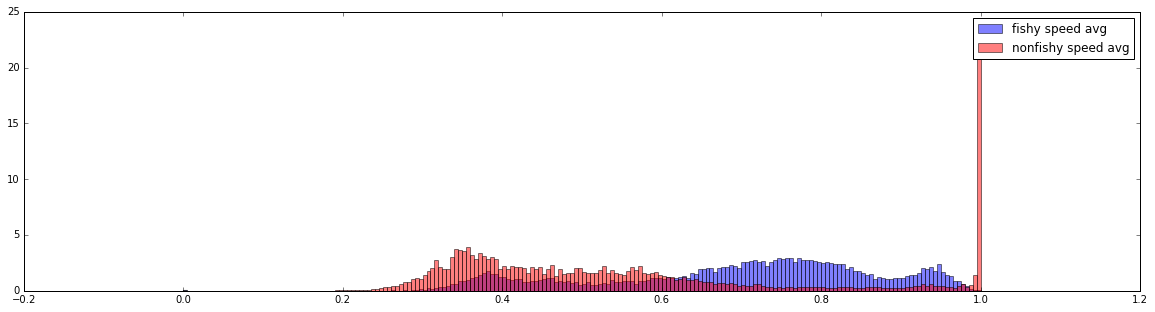

In [29]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(111)
subplot.hist(xfishy["measure_speeddavg"], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed avg")
subplot.hist(xnonfishy["measure_speeddavg"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed avg")
legend()
show()

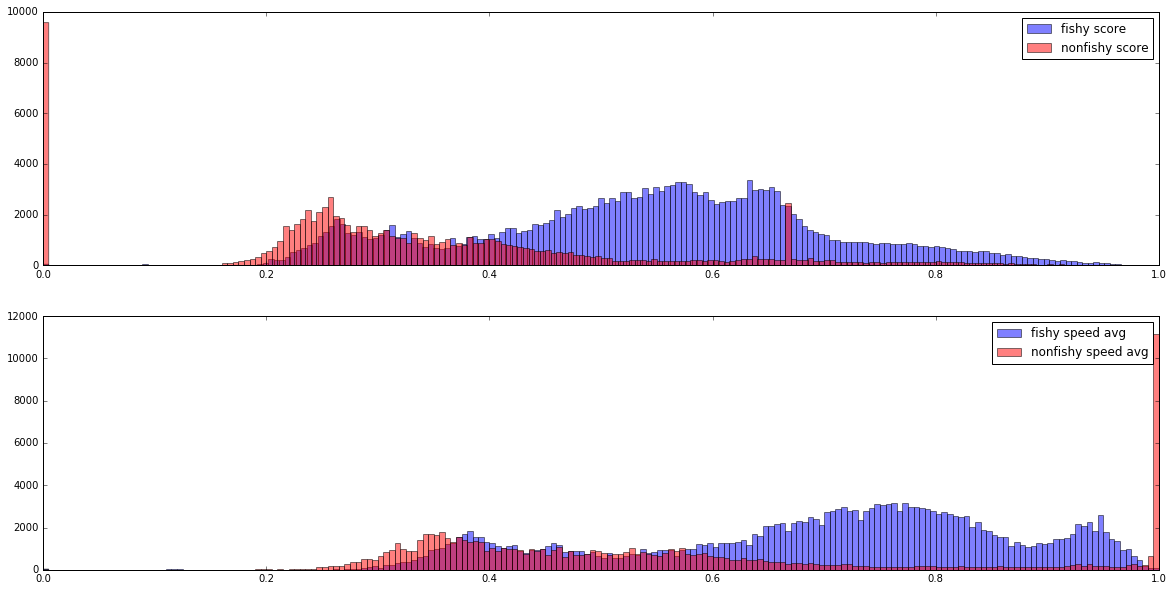

In [34]:
histfig = figure(figsize=(20,10))
subplot = histfig.add_subplot(211)
subplot.hist(xfishy["measure_new_score"], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
subplot.hist(xnonfishy["measure_new_score"], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(212)
xfishy_speed_clamp = clamp(xfishy["measure_speeddavg"], 0, 1)
xnonfishy_speed_clamp = clamp(xnonfishy["measure_speeddavg"], 0, 1)
subplot.hist(xfishy_speed_clamp, bins=200, normed=False, color='b', alpha=0.5, label="fishy speed avg")
subplot.hist(xnonfishy_speed_clamp, bins=200, normed=False, color='r', alpha=0.5, label="nonfishy speed avg")
legend()

show()

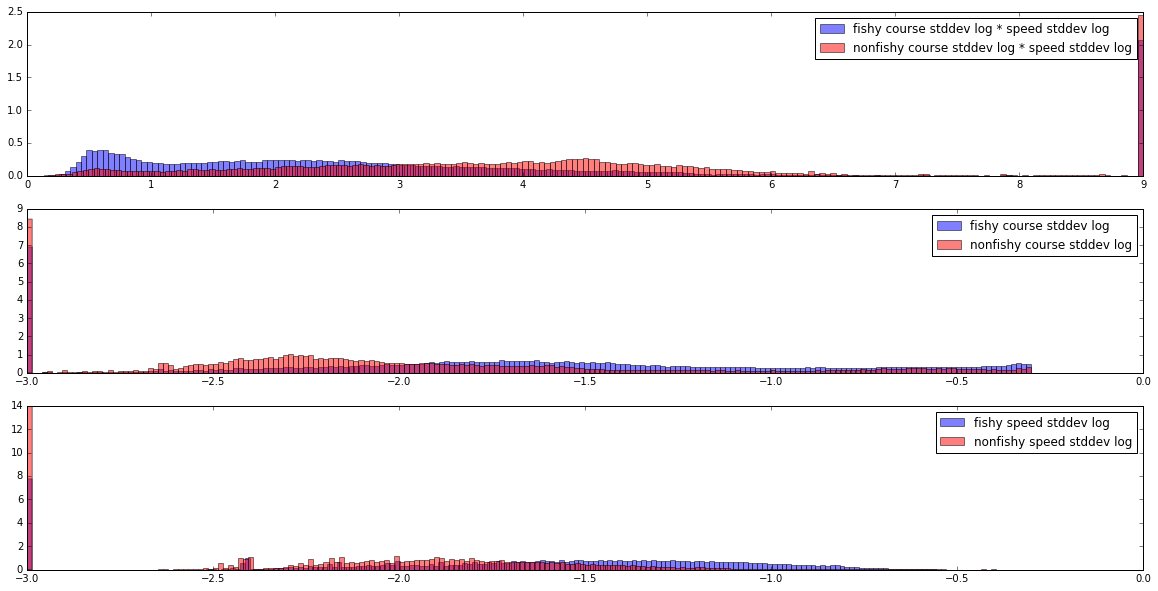

In [37]:
histfig = figure(figsize=(20,10))

subplot = histfig.add_subplot(311)
subplot.hist(log10(xfishy["measure_coursestddev"]+0.001)*log10(xfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log * speed stddev log")
subplot.hist(log10(xnonfishy["measure_coursestddev"]+0.001)*log10(xnonfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log * speed stddev log")
legend()

subplot = histfig.add_subplot(312)
subplot.hist(log10(xfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log")
subplot.hist(log10(xnonfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log")
legend()

subplot = histfig.add_subplot(313)
subplot.hist(log10(xfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev log")
subplot.hist(log10(xnonfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev log")
legend()


show()


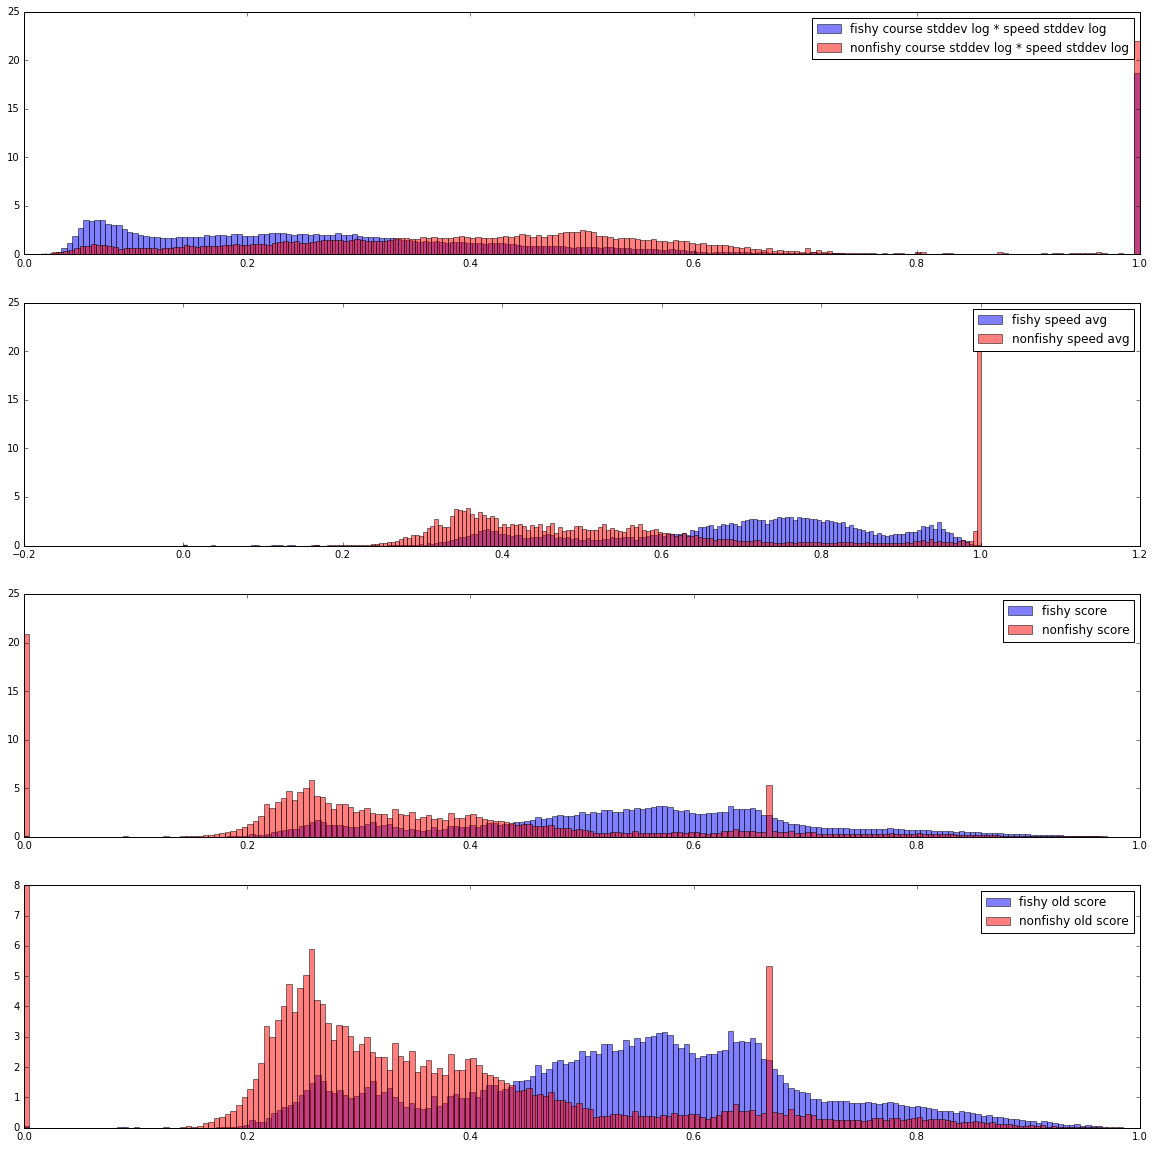

In [8]:
histfig = figure(figsize=(20,20))

subplot = histfig.add_subplot(411)
subplot.hist(log10(xfishy["measure_coursestddev"]+0.001)*log10(xfishy["measure_speedddev"]+0.001)/9., bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log * speed stddev log")
subplot.hist(log10(xnonfishy["measure_coursestddev"]+0.001)*log10(xnonfishy["measure_speedddev"]+0.001)/9., bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log * speed stddev log")
legend()

subplot = histfig.add_subplot(412)
subplot.hist(xfishy["measure_speeddavg"], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed avg")
subplot.hist(xnonfishy["measure_speeddavg"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed avg")
legend()

subplot = histfig.add_subplot(413)
subplot.hist(clamp(where(xfishy["distance_to_shore"] < 3, 0, (xfishy["measure_coursestddev"]+xfishy["measure_speedddev"]+xfishy["measure_speeddavg"])*2./3.), 0, 1), bins=200, normed=True, color='b', alpha=0.5, label="fishy score")
subplot.hist(clamp(where(xnonfishy["distance_to_shore"] < 3, 0, (xnonfishy["measure_coursestddev"]+xnonfishy["measure_speedddev"]+xnonfishy["measure_speeddavg"])*2./3.), 0, 1), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(414)
subplot.hist(xfishy["measure_new_score"], bins=200, normed=True, color='b', alpha=0.5, label="fishy old score")
subplot.hist(xnonfishy["measure_new_score"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy old score")
subplot.set_ylim(0., 8.)
legend()

show()

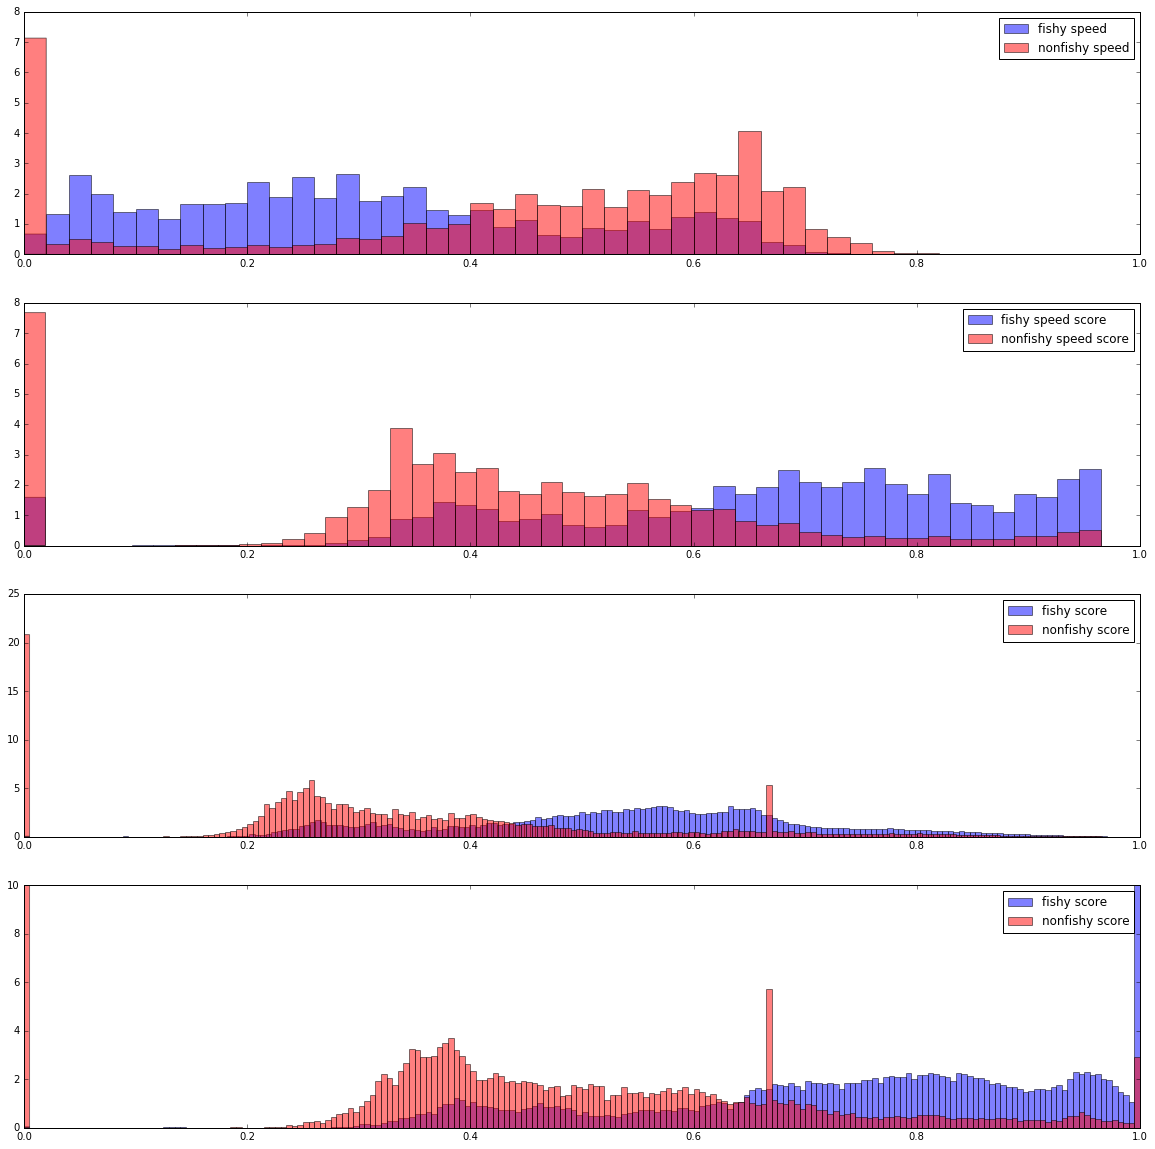

In [31]:
histfig = figure(figsize=(20,20))

subplot = histfig.add_subplot(411)
subplot.hist(clamp(xfishy["speed"]/17, 0, 1), bins=50, normed=True, color='b', alpha=0.5, label="fishy speed")
subplot.hist(clamp(xnonfishy["speed"]/17, 0, 1), bins=50, normed=True, color='r', alpha=0.5, label="nonfishy speed")
legend()

xfishy_speedscore = where(xfishy["speed"] > 0.5, 1.0 - clamp(xfishy["speed"]/17, 0, 1), 0)
xnonfishy_speedscore = where(xnonfishy["speed"] > 0.5, 1.0 - clamp(xnonfishy["speed"]/17, 0, 1), 0)

subplot = histfig.add_subplot(412)
subplot.hist(xfishy_speedscore, bins=50, normed=True, color='b', alpha=0.5, label="fishy speed score")
subplot.hist(xnonfishy_speedscore, bins=50, normed=True, color='r', alpha=0.5, label="nonfishy speed score")
legend()

subplot = histfig.add_subplot(413)
subplot.hist(clamp(where(xfishy["distance_to_shore"] < 3, 0, (xfishy["measure_coursestddev"]+xfishy["measure_speedddev"]+xfishy["measure_speeddavg"])*2./3.), 0, 1), bins=200, normed=True, color='b', alpha=0.5, label="fishy score")
subplot.hist(clamp(where(xnonfishy["distance_to_shore"] < 3, 0, (xnonfishy["measure_coursestddev"]+xnonfishy["measure_speedddev"]+xnonfishy["measure_speeddavg"])*2./3.), 0, 1), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(414)
subplot.hist(clamp(where(xfishy["distance_to_shore"] < 3, 0, (xfishy["measure_coursestddev"]+xfishy["measure_speedddev"]+xfishy["measure_speeddavg"]+xfishy_speedscore/2)*2./3.), 0, 1), bins=200, normed=True, color='b', alpha=0.5, label="fishy score")
subplot.hist(clamp(where(xnonfishy["distance_to_shore"] < 3, 0, (xnonfishy["measure_coursestddev"]+xnonfishy["measure_speedddev"]+xnonfishy["measure_speeddavg"]+xnonfishy_speedscore/2)*2./3.), 0, 1), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy score")
subplot.set_ylim(0., 10)
legend()


show()

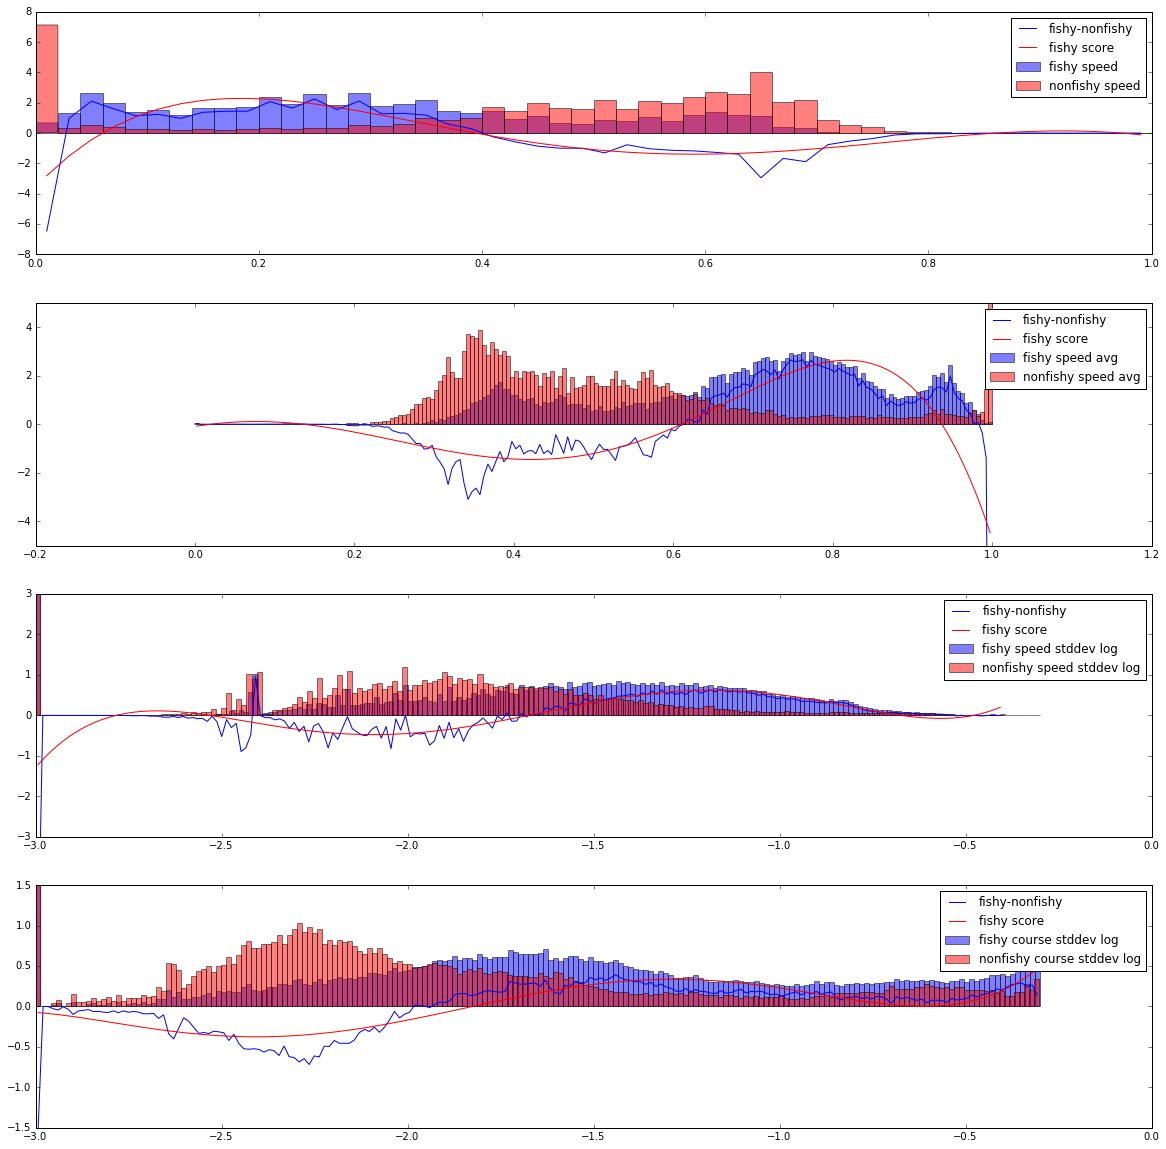

In [15]:
histfix = figure(figsize=(20,20))

histfix.add_subplot(411)

xfishy_hist = center_hist_bins(hist(clamp(xfishy["speed"]/17, 0, 1), bins=50, normed=True, color='b', alpha=0.5, label="fishy speed"))
xnonfishy_hist = center_hist_bins(hist(clamp(xnonfishy["speed"]/17, 0, 1), bins=50, normed=True, color='r', alpha=0.5, label="nonfishy speed"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

speed_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *speed_args) for value in x_hist[1]], color='r', label='fishy score')

legend()



histfix.add_subplot(412).set_ylim(-5, 5)

xfishy_hist = center_hist_bins(hist(xfishy["measure_speeddavg"], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed avg"))
xnonfishy_hist = center_hist_bins(hist(xnonfishy["measure_speeddavg"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed avg"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

measure_speedavg_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *measure_speedavg_args) for value in x_hist[1]], color='r', label='fishy score')

legend()



histfix.add_subplot(413).set_ylim(-3, 3)

xfishy_hist = center_hist_bins(hist(log10(xfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev log"))
xnonfishy_hist = center_hist_bins(hist(log10(xnonfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev log"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

measure_speedddev_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *measure_speedddev_args) for value in x_hist[1]], color='r', label='fishy score')

legend()



histfix.add_subplot(414).set_ylim(-1.5, 1.5)

xfishy_hist = center_hist_bins(hist(log10(xfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log"))
xnonfishy_hist = center_hist_bins(hist(log10(xnonfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

measure_coursestddev_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *measure_coursestddev_args) for value in x_hist[1]], color='r', label='fishy score')

legend()


show()



In [41]:
try:
    x = append_fields(x, 'score_speed', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_speeddavg', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_speedddev', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_coursestddev', [], dtypes='<f8', fill_value=0.0)
except:
    pass

x['score_speed'][:] = polynomial(clamp(x["speed"]/17, 0, 1), *speed_args)
x['score_speeddavg'][:] = polynomial(x["measure_speeddavg"], *measure_speedavg_args)
x['score_speedddev'][:] = polynomial(log10(x["measure_speedddev"]+0.001), *measure_speedddev_args)
x['score_coursestddev'][:] = polynomial(log10(x["measure_coursestddev"]+0.001), *measure_coursestddev_args)

xfishy = fishy(x)
xnonfishy = nonfishy(x)

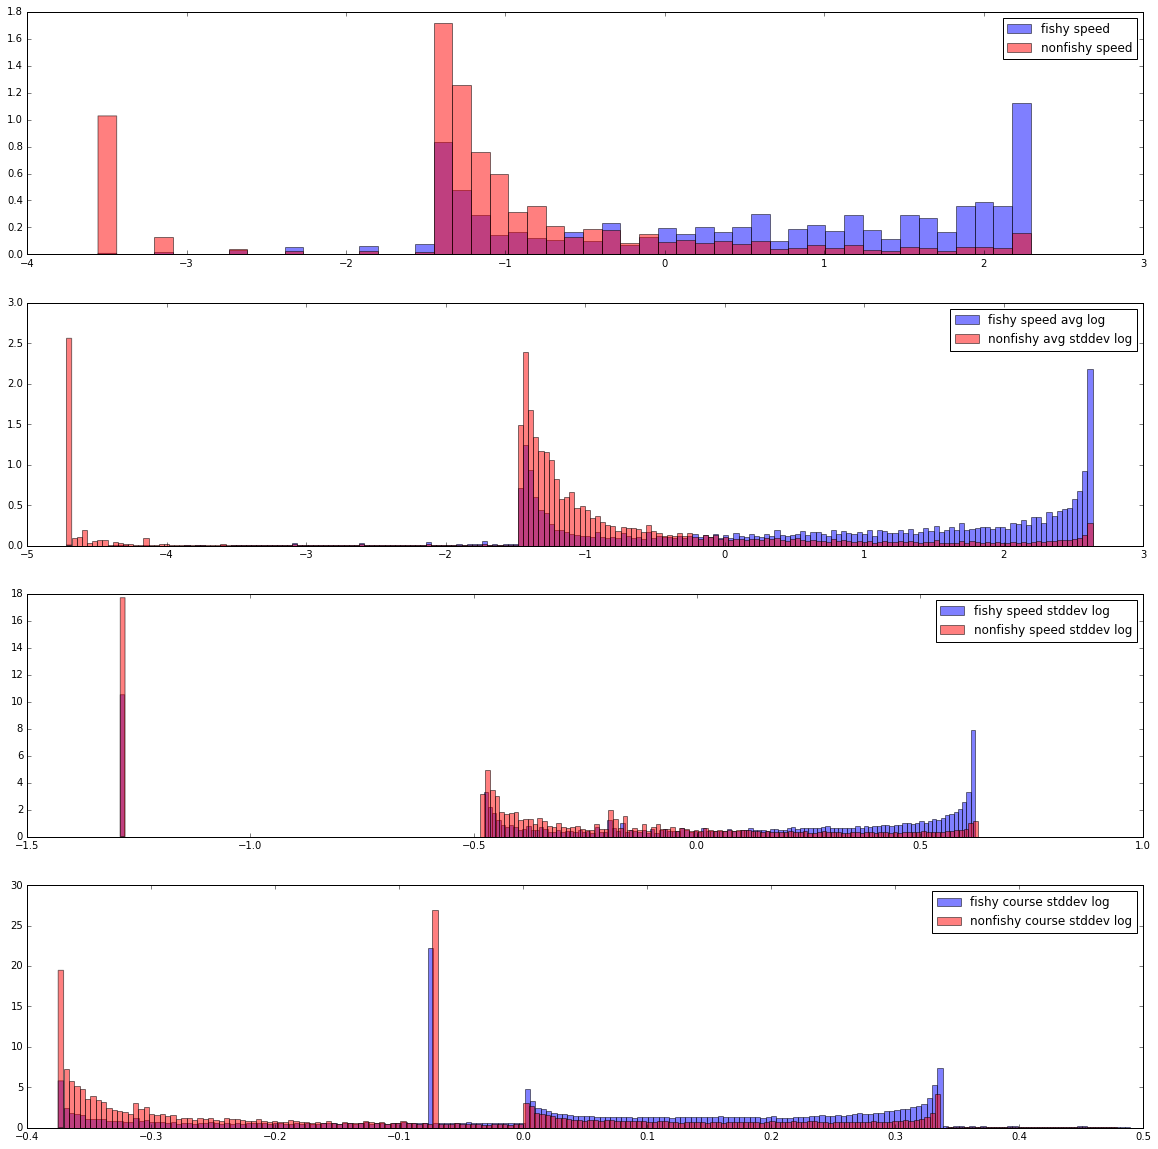

In [52]:
histfix = figure(figsize=(20,20))

histfix.add_subplot(411)
hist(xfishy['score_speed'], bins=50, normed=True, color='b', alpha=0.5, label="fishy speed")
hist(xnonfishy['score_speed'], bins=50, normed=True, color='r', alpha=0.5, label="nonfishy speed")
legend()

histfix.add_subplot(412)
hist(xfishy['score_speeddavg'], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed avg log")
hist(xnonfishy['score_speeddavg'], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy avg stddev log")
legend()

histfix.add_subplot(413)
hist(xfishy['score_speedddev'], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev log")
hist(xnonfishy['score_speedddev'], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev log")
legend()

histfix.add_subplot(414)
hist(xfishy['score_coursestddev'], bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log")
hist(xnonfishy['score_coursestddev'], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log")
legend()
show()

In [53]:
def linear(x, *args):
    res = 0.0
    for idx, arg in enumerate(args):
        res += x[idx]*arg
    return res
        
score_args = curve_fit(linear, (x['score_speed'], x['score_speeddavg'], x['score_speedddev'], x['score_coursestddev']), x['classification'], [1]*4)[0]

In [56]:
try:
    x = append_fields(x, 'score', [], dtypes='<f8', fill_value=0.0)
except:
    pass

x['score'][:] = linear((x['score_speed'], x['score_speeddavg'], x['score_speedddev'], x['score_coursestddev']), *score_args)

xfishy = fishy(x)
xnonfishy = nonfishy(x)


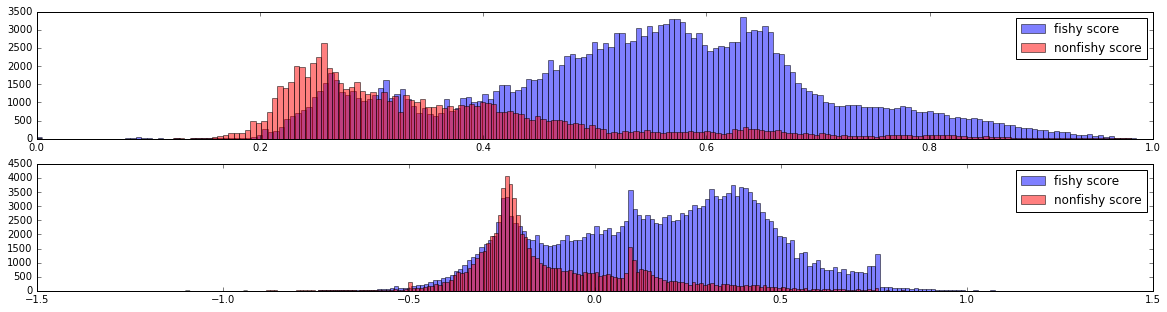

In [65]:
histfig = figure(figsize=(20,5))

subplot = histfig.add_subplot(211)
subplot.hist(xfishy["measure_new_score"][xfishy['distance_to_shore'] > 3], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
subplot.hist(xnonfishy["measure_new_score"][xnonfishy['distance_to_shore'] > 3], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(212)
subplot.hist(xfishy["score"][xfishy['distance_to_shore'] > 3], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
subplot.hist(xnonfishy["score"][xnonfishy['distance_to_shore'] > 3], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()


show()